## 加载iris数据集

In [24]:
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset.data)
print(dataset.target)
print(dataset.target_names)
print([dataset.target_names[val] for val in dataset.target])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 划分数据集

In [31]:
from sklearn.model_selection import train_test_split

X = dataset.data
Y = dataset.target

# 一般训练集:测试集=7:3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=0)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


## 训练数据

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## 模型评估

### 混淆矩阵

In [33]:
import numpy as np
y_pred = model.fit(X_train, y_train).predict(X_test)
print(y_pred)
print(y_test)
print(f"误分类的个数：{np.sum(y_pred!=y_test)},总测试样本：{len(y_test)}")

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2]
误分类的个数：5,总测试样本：90


In [34]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
print(matrix)

[[26  0  0]
 [ 0 33  5]
 [ 0  0 26]]


#### 可视化混淆矩阵 （热力图）

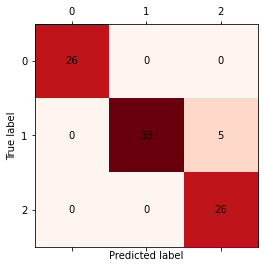

In [35]:
import matplotlib.pyplot as plt
plt.matshow(matrix, cmap=plt.cm.Reds)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        plt.annotate(matrix[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 准确率 Accuracy

In [46]:
accuracy = (len(y_pred) - (y_pred != y_test).sum())/len(y_pred)
print(f"accuracy:{accuracy}")

accuracy:0.9444444444444444


### Precision, recall and F1

In [47]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.87      1.00      0.93        33
           2       1.00      0.84      0.91        31

    accuracy                           0.94        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.95      0.94      0.94        90



macro 是调和均值